In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [14]:
df = pd.read_csv('water_potability.csv', sep=',')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# DEA

In [15]:
#dimension del dataset
df.shape

(3276, 10)

In [16]:
#Nulos en el dataset por columna
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [17]:
#porcentajes de nulos en cada columna
for col in df.columns:
    print(f'% nulos {col}: {(df[col].isnull().sum()*100)/df.shape[0]:.2f}%')

% nulos ph: 14.99%
% nulos Hardness: 0.00%
% nulos Solids: 0.00%
% nulos Chloramines: 0.00%
% nulos Sulfate: 23.84%
% nulos Conductivity: 0.00%
% nulos Organic_carbon: 0.00%
% nulos Trihalomethanes: 4.95%
% nulos Turbidity: 0.00%
% nulos Potability: 0.00%


Análisis de columnas con elementos nulos 

In [18]:
def plot_dis(column_name):
    
    sns.displot(data = df[column_name].loc[(df['Potability']==0) & ~df[column_name].isnull()], kde=True).set(title=f'Dist of {column_name} class=0')
    print(f"Mean {column_name}(class 0): {df[column_name].loc[(df['Potability']==0) & ~df[column_name].isnull()].mean():.2f}")
    print(f"Median {column_name}(class 0): {df[column_name].loc[(df['Potability']==0) & ~df[column_name].isnull()].median():.2f}")
    

    sns.displot(data = df[column_name].loc[(df['Potability']==1) & ~df[column_name].isnull()],  kde=True).set(title=f'Dist of {column_name} class=1')
    print(f"Mean {column_name}(class 1): {df[column_name].loc[(df['Potability']==1) & ~df[column_name].isnull()].mean():.2f}")
    print(f"Median {column_name}(class 1): {df[column_name].loc[(df['Potability']==1) & ~df[column_name].isnull()].median():.2f}")


Mean ph(class 0): 7.09
Median ph(class 0): 7.04
Mean ph(class 1): 7.07
Median ph(class 1): 7.04


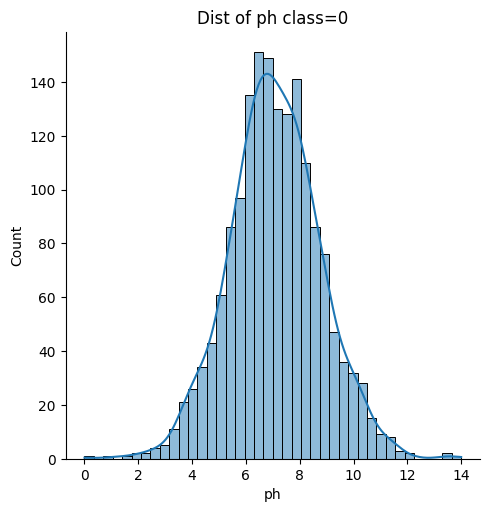

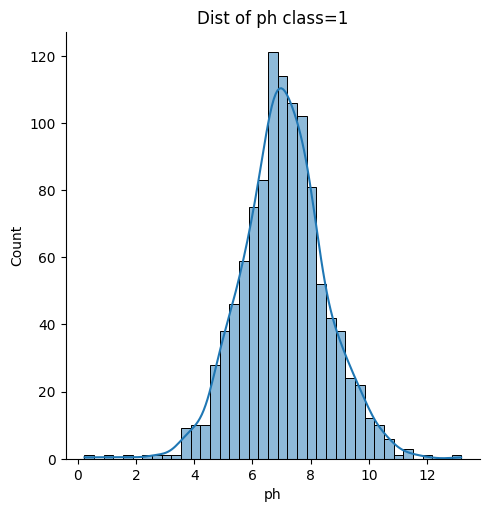

In [19]:
plot_dis('ph')

Mean Sulfate(class 0): 334.56
Median Sulfate(class 0): 333.39
Mean Sulfate(class 1): 332.57
Median Sulfate(class 1): 331.84


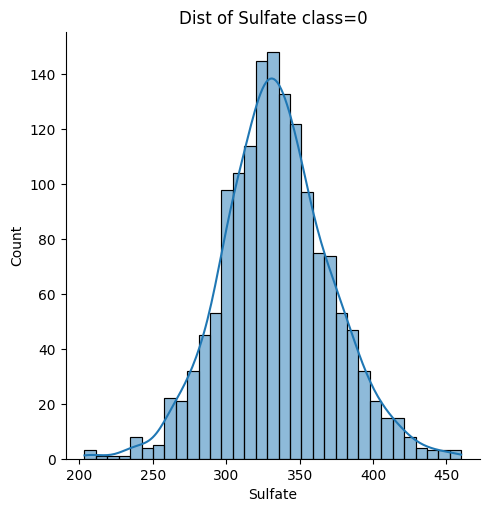

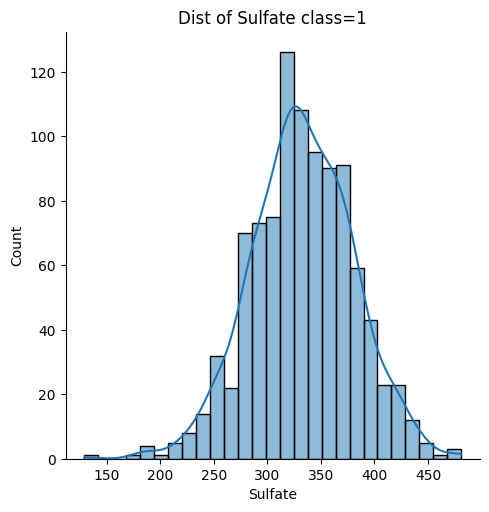

In [20]:
plot_dis('Sulfate')

Mean Trihalomethanes(class 0): 66.30
Median Trihalomethanes(class 0): 66.54
Mean Trihalomethanes(class 1): 66.54
Median Trihalomethanes(class 1): 66.68


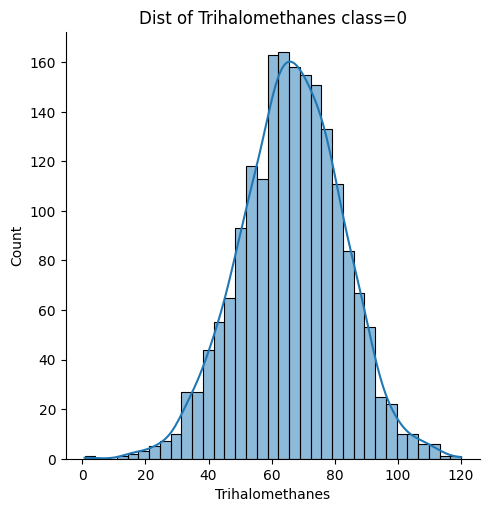

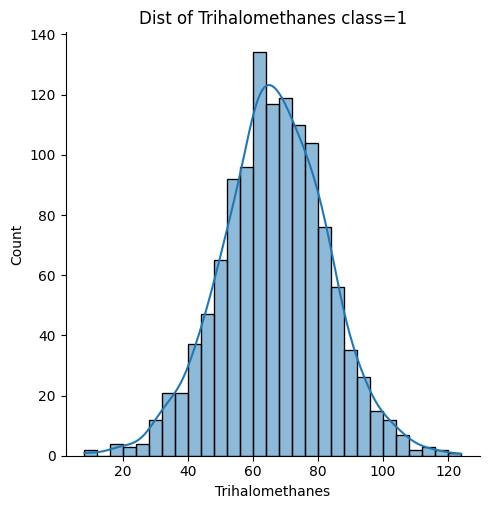

In [21]:
plot_dis('Trihalomethanes')

Las distribuciones normales nos permiten reemplazar los valores faltantes por la media o la mediana. Cabe resaltar que las diferencias entre los valores de las columnas analisadas para la clase 0 y 1 no son muy grandes

In [22]:
df['ph'].fillna(df.groupby('Potability')['ph'].transform('mean'), inplace=True)
df['Sulfate'].fillna(df.groupby('Potability')['Sulfate'].transform('mean'), inplace=True)
df['Trihalomethanes'].fillna(df.groupby('Potability')['Trihalomethanes'].transform('mean'), inplace=True)


In [23]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot: xlabel='Potability', ylabel='Turbidity'>

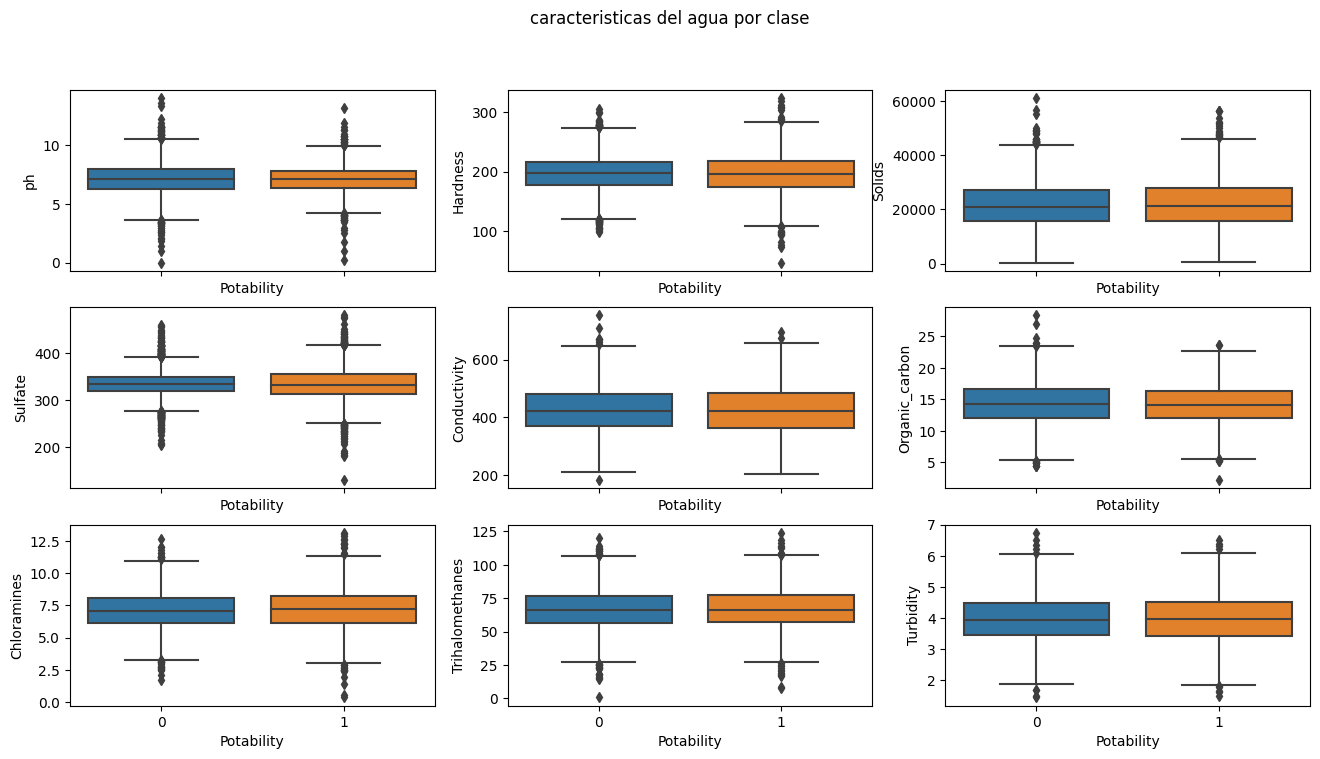

In [41]:
fig, axes = plt.subplots(3, 3, sharex=True, figsize=(16,8))
fig.suptitle('caracteristicas del agua por clase')

sns.boxplot(ax=axes[0, 0], data=df, x='Potability', y='ph')
sns.boxplot(ax=axes[0, 1], data=df, x='Potability', y='Hardness')
sns.boxplot(ax=axes[0, 2], data=df, x='Potability', y='Solids')
sns.boxplot(ax=axes[1, 0], data=df, x='Potability', y='Sulfate')
sns.boxplot(ax=axes[1, 1], data=df, x='Potability', y='Conductivity')
sns.boxplot(ax=axes[1, 2], data=df, x='Potability', y='Organic_carbon')
sns.boxplot(ax=axes[2, 0], data=df, x='Potability', y='Chloramines')
sns.boxplot(ax=axes[2, 1], data=df, x='Potability', y='Trihalomethanes')
sns.boxplot(ax=axes[2, 2], data=df, x='Potability', y='Turbidity')

# Machine Learning model

In [80]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [72]:
X = df.drop('Potability', axis=1, inplace=False)
y = df['Potability']

In [73]:
#balance de la clase
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2)

In [75]:
std_sc = StandardScaler()

X_train = std_sc.fit_transform(X_train)
X_test = std_sc.transform(X_test)

X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)

In [76]:
lr_cv = cross_validate(LogisticRegression(), X_train, y_train, scoring=('recall','accuracy', 'f1'), cv=5 )
svm_cv = cross_validate(SVC(), X_train, y_train, scoring=('recall','accuracy', 'f1'), cv=5 )
rf_cv = cross_validate(RandomForestClassifier(), X_train, y_train, scoring=('recall','accuracy', 'f1'), cv=5 )

In [77]:
print(f'''LogisticRegression results:
            acc: {lr_cv["test_accuracy"]}
            recall: {lr_cv["test_recall"]}
            f1: {lr_cv["test_f1"]}
            ''')

print(f'''SVM results:
            acc: {svm_cv["test_accuracy"]}
            recall: {svm_cv["test_recall"]}
            f1: {svm_cv["test_f1"]}
            ''')

print(f'''RandomForest results:
            acc: {rf_cv["test_accuracy"]}
            recall: {rf_cv["test_recall"]}
            f1: {rf_cv["test_f1"]}
            ''')

LogisticRegression results:
            acc: [0.61259542 0.60496183 0.60877863 0.60114504 0.60305344]
            recall: [0.01932367 0.         0.00966184 0.00966184 0.00966184]
            f1: [0.03791469 0.         0.01913876 0.01877934 0.01886792]
            
SVM results:
            acc: [0.67175573 0.69847328 0.68129771 0.65076336 0.64694656]
            recall: [0.28019324 0.34782609 0.28502415 0.28019324 0.2173913 ]
            f1: [0.40277778 0.47682119 0.41403509 0.38795987 0.32727273]
            
RandomForest results:
            acc: [0.79770992 0.77290076 0.78625954 0.79198473 0.80343511]
            recall: [0.65217391 0.61352657 0.60869565 0.65217391 0.63285024]
            f1: [0.71808511 0.68096515 0.69230769 0.71240106 0.71780822]
            


gridSearch: Usaremos random forest ya que este fue el que nos arrojó mejores resultados realizando cross-validation

In [87]:
params = {
    'n_estimators':[500, 750],
    'criterion': ['gini', 'entropy'],
    'max_depth': [50, 75, 100]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring=('recall', 'accuracy', 'f1'), refit='accuracy', cv=5)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 75, 100],
                         'n_estimators': [500, 750]},
             refit='accuracy', scoring=('recall', 'accuracy', 'f1'))

In [88]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 750}

In [89]:
y_pred_train = grid.predict(X_train)
y_pred_test = grid.predict(X_test)


        Performance in train:
        acc: 1.0
        f1: 1.0
        recall: 1.0
        prec: 1.0


<AxesSubplot: >

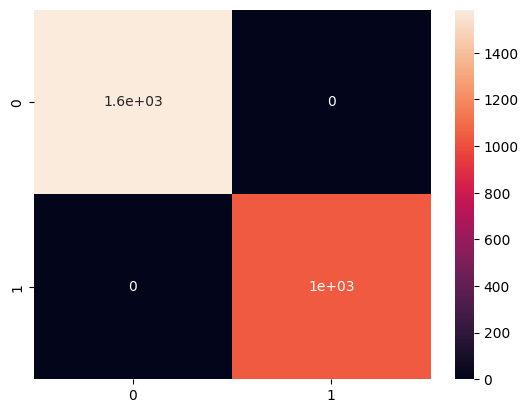

In [90]:
print(f'''
        Performance in train:
        acc: {accuracy_score(y_train, y_pred_train)}
        f1: {f1_score(y_train, y_pred_train)}
        recall: {recall_score(y_train, y_pred_train)}
        prec: {precision_score(y_train, y_pred_train)}''')

sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True)


        Performance in train:
        acc: 0.801829268292683
        f1: 0.699074074074074
        recall: 0.6213991769547325
        prec: 0.798941798941799


<AxesSubplot: >

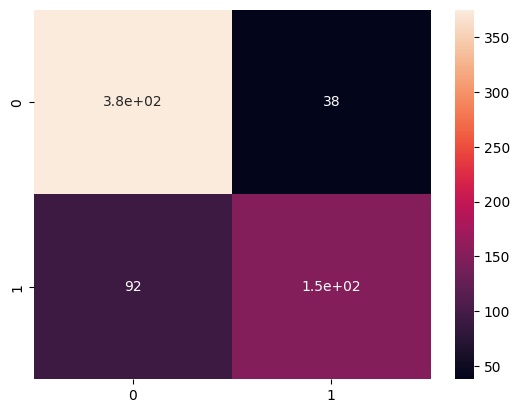

In [91]:
print(f'''
        Performance in train:
        acc: {accuracy_score(y_test, y_pred_test)}
        f1: {f1_score(y_test, y_pred_test)}
        recall: {recall_score(y_test, y_pred_test)}
        prec: {precision_score(y_test, y_pred_test)}''')

sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True)